In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import AllTogether as t
import seaborn as sns
from datetime import datetime
%matplotlib inline


In [268]:
# read calendar data
df_calendar = pd.read_csv('./calendar.csv')
df_calendar.head()
df_calendar.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


In [269]:
# basic analysis
print('columns: \n', df_calendar.columns)
print('total rows: ',df_calendar.shape[0])
print('total columns: ',df_calendar.shape[1])
print('column types: \n', df_calendar.dtypes)

columns: 
 Index(['listing_id', 'date', 'available', 'price'], dtype='object')
total rows:  1393570
total columns:  4
column types: 
 listing_id     int64
date          object
available     object
price         object
dtype: object


In [270]:
# check how many unique listings
df_calendar['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
479653      365
3251069     365
6400379     365
8597800     365
4841586     365
7710713     365
3155785     365
6949900     365
3646393     365
3870253     365
1252147     365
9280767     365
808134      365
1737244     365
7262358     365
9910189     365
5078244     365
7178490     365
7182584     365
8463726     365
8989807     365
9497431     365
3904056     365
2277640     365
6837338     365
           ... 
8518308     365
8579782     365
8409750     365
1317919     365
7506165     365
9939025     365
948077      365
7096107     365
9117633     365
2406966     365
8157486     365
3657819     365
8568567     365
4130112     365
6363779     365
10309898    365
5433597     365
2809796     365
8474294     365
24212       365
279063      365
3975434     365
6823837     365
7627794     365
8566475     365
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length

In [271]:
# remove unwanted characters from price and convert it to numeric
df_calendar['price'] = df_calendar['price'].replace('[$,]','', regex=True).astype(float)

In [272]:
df_calendar['price'].value_counts()

150.0    36646
100.0    31755
75.0     29820
125.0    27538
65.0     26415
90.0     24942
95.0     24327
99.0     23629
85.0     23455
80.0     19817
110.0    19454
120.0    19145
70.0     18439
60.0     18004
175.0    17707
250.0    16870
55.0     16864
200.0    16144
50.0     15978
115.0    14775
40.0     13357
69.0     12922
135.0    11455
105.0    11062
130.0    11008
89.0     10355
79.0     10133
225.0     8163
45.0      8134
129.0     8111
         ...  
654.0        1
652.0        1
646.0        1
643.0        1
494.0        1
603.0        1
637.0        1
636.0        1
625.0        1
624.0        1
623.0        1
668.0        1
669.0        1
674.0        1
566.0        1
554.0        1
503.0        1
716.0        1
562.0        1
616.0        1
708.0        1
567.0        1
501.0        1
693.0        1
570.0        1
686.0        1
685.0        1
683.0        1
676.0        1
711.0        1
Name: price, Length: 669, dtype: int64

In [273]:
# convert string dates to date_time values
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')

In [274]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [275]:
# determine seasons, ref: https://www.timeanddate.com/calendar/aboutseasons.html
seasons = {
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
    12: 'winter'
}

In [276]:
# add season info in dataframe
df_calendar['date_season'] = df_calendar['date'].dt.month.apply(lambda x: seasons[x])

In [277]:
df_calendar['date_season'].value_counts()

summer    351256
spring    351256
fall      347438
winter    343620
Name: date_season, dtype: int64

In [278]:
df_calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [279]:
# convert boolean string to boolean int
df_calendar['available'] = df_calendar['available'].replace({'t': 1, 'f': 0})

In [280]:
df_calendar['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [281]:
# find availability per season, the lower the busier
availability_per_season = df_calendar.groupby(df_calendar['date_season'])['available'].sum().sort_values()

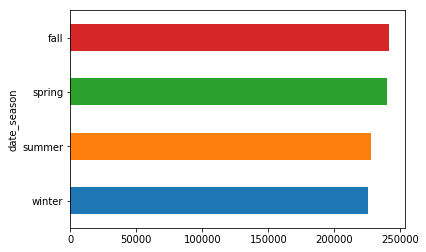

In [282]:
availability_per_season.plot(kind = 'barh')

In [283]:
# find price per season, the more pricy means more demanding
price_per_season = df_calendar.groupby(df_calendar['date_season'])['price'].mean().sort_values(ascending = False)

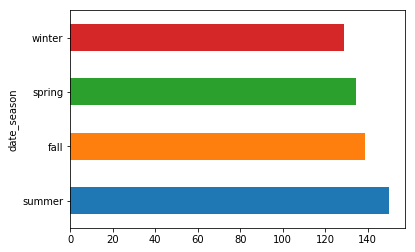

In [284]:
price_per_season.plot(kind = 'barh')

In [285]:
# start the EDA for listings

In [286]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [287]:
# identify missing values of more than 75%
set(df_listings.columns[df_listings.isnull().mean() > 0.75])

{'license', 'square_feet'}

In [288]:
# delete the most missing values columns
df_listings = df_listings.drop(columns = ['license', 'square_feet'])

In [289]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [290]:
# columns that would not help in our modeling
unimportant_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
                     'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
                      'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
                      'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                      'host_verifications', 'street', 'neighbourhood', 'city', 'state', 'zipcode', 'country_code', 
                      'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'amenities','host_listings_count', 
                       'market', 'smart_location', 'country', 'calendar_updated', 'has_availability', 
                       'calendar_last_scraped', 'first_review', 'last_review', 'jurisdiction_names', 
                       'calculated_host_listings_count']

In [291]:
df_listings = df_listings.drop(columns = unimportant_columns)

In [292]:
df_listings.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2011-08-11,within a few hours,96%,100%,f,3.0,t,t,47.636289,-122.371025,...,10.0,10.0,9.0,10.0,f,f,moderate,f,f,4.07
1,2013-02-21,within an hour,98%,100%,t,6.0,t,t,47.639123,-122.365666,...,10.0,10.0,10.0,10.0,f,f,strict,t,t,1.48
2,2014-06-12,within a few hours,67%,100%,f,2.0,t,t,47.629724,-122.369483,...,10.0,10.0,10.0,10.0,f,f,strict,f,f,1.15
3,2013-11-06,NaN,NaN,NaN,f,1.0,t,t,47.638473,-122.369279,...,NaN,NaN,NaN,NaN,f,f,flexible,f,f,NaN
4,2011-11-29,within an hour,100%,NaN,f,2.0,t,t,47.632918,-122.372471,...,10.0,10.0,9.0,9.0,f,f,strict,f,f,0.89


In [293]:
print(df_listings.shape[0])
print(df_listings.shape[1])

3818
45


In [294]:
# identify price columns, they have special characters
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [295]:
# remove unwanted characters from price and convert it to numeric
for price in price_columns:
    df_listings[price] = df_listings[price].replace('[$,]','', regex=True).astype(float)

In [296]:
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
                  'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [297]:
df_listings['requires_license'].value_counts()

f    3818
Name: requires_license, dtype: int64

In [298]:
# remove column whose data is skewed
df_listings = df_listings.drop(columns = ['requires_license'])

In [299]:
# convert boolean string to boolean int
for boolean_column in boolean_columns:
    df_listings[boolean_column] = df_listings[boolean_column].replace({'t': 1, 'f': 0})

In [300]:
df_listings['host_acceptance_rate'].value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

In [301]:
# remove column whose data is skewed
df_listings = df_listings.drop(columns = ['host_acceptance_rate'])

In [302]:
# remove unwanted characters from percentage column and convert it to numeric
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace('%', '', regex=True).astype(float)

In [303]:
# convert string dates to date_time values
df_listings['host_since'] = pd.to_datetime(df_listings['host_since'], format='%Y-%m-%d')

In [304]:
df_listings['host_since'].tail()

3813   2015-04-13
3814   2015-10-14
3815   2015-12-30
3816   2015-01-03
3817   2014-04-25
Name: host_since, dtype: datetime64[ns]

In [305]:
# find first day of the data, then host_since (in days) = (first_day - host_since).days
first_day = pd.to_datetime('2016-01-04')
print(first_day)

2016-01-04 00:00:00


In [306]:
# convert date_time values to number of days numeric
df_listings['host_since'] = df_listings['host_since'].apply(lambda date: (first_day - date).days)

In [307]:
df_listings['host_since'].tail()

3813    266.0
3814     82.0
3815      5.0
3816    366.0
3817    619.0
Name: host_since, dtype: float64

In [308]:
df_listings.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month'],
      dtype='object')

In [309]:
# drop any row where price is NAN
df_listings = df_listings.dropna(subset=['price'], axis=0)

In [310]:
# identify numeric columns
numeric_columns = df_listings.select_dtypes(include=['float', 'int']).columns
numeric_columns

Index(['host_since', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month'],
      dtype='object')

In [311]:
# fill missing numeric column with mean of the column
for col in numeric_columns:
        df_listings[col].fillna((df_listings[col].mean()), inplace=True)

In [312]:
df_listings.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1607.0,within a few hours,96.000000,0.0,3.0,1.0,1.0,47.636289,-122.371025,1,...,10.000000,10.000000,10.000000,9.000000,10.000000,0,moderate,0,0,4.070000
1,1047.0,within an hour,98.000000,1.0,6.0,1.0,1.0,47.639123,-122.365666,1,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,strict,1,1,1.480000
2,571.0,within a few hours,67.000000,0.0,2.0,1.0,1.0,47.629724,-122.369483,1,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,strict,0,0,1.150000
3,789.0,NaN,94.886798,0.0,1.0,1.0,1.0,47.638473,-122.369279,1,...,9.556398,9.786709,9.809599,9.608916,9.452245,0,flexible,0,0,2.078919
4,1497.0,within an hour,100.000000,0.0,2.0,1.0,1.0,47.632918,-122.372471,1,...,9.000000,10.000000,10.000000,9.000000,9.000000,0,strict,0,0,0.890000


In [313]:
# identify categorical columns
categorical_columns = df_listings.select_dtypes(include=['object']).columns
categorical_columns

Index(['host_response_time', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

In [314]:
# fill missing categorical columns with dummy data
for col in  categorical_columns:
        df_listings = pd.concat([df_listings.drop(col, axis=1), pd.get_dummies(df_listings[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

In [315]:
df_listings.head()

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,1607.0,96.000000,0.0,3.0,1.0,1.0,47.636289,-122.371025,1,4,...,0,0,0,0,0,0,0,1,1,0
1,1047.0,98.000000,1.0,6.0,1.0,1.0,47.639123,-122.365666,1,4,...,0,0,0,0,0,0,0,1,0,1
2,571.0,67.000000,0.0,2.0,1.0,1.0,47.629724,-122.369483,1,11,...,0,0,0,0,0,0,0,1,0,1
3,789.0,94.886798,0.0,1.0,1.0,1.0,47.638473,-122.369279,1,3,...,0,0,0,0,0,0,0,1,0,0
4,1497.0,100.000000,0.0,2.0,1.0,1.0,47.632918,-122.372471,1,6,...,0,0,0,0,0,0,0,1,0,1


In [316]:
y = df_listings['price']
# remove the response column
df_listings = df_listings.drop(['price'], axis=1)
X = df_listings

Training sample: 2672
Testing sample: 1146
train_score: 0.9244719805544821
test_score: 0.6415842597081213


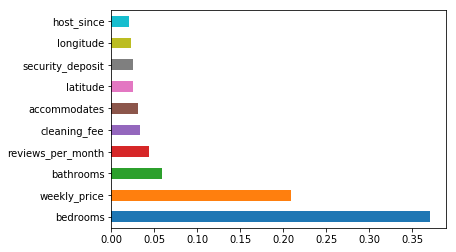

In [317]:
# data modeling
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print('Training sample: {}'.format(X_train.shape[0]))
print('Testing sample: {}'.format(X_test.shape[0]))

# instantiate model
rf_model = RandomForestRegressor()
# fit training data
rf_model.fit(X_train, y_train)
# predict price on training and test data
y_test_preds = rf_model.predict(X_test)
y_train_preds = rf_model.predict(X_train)

train_score = r2_score(y_train, y_train_preds)
print('train_score: {}'.format(train_score))
test_score = r2_score(y_test, y_test_preds)
print('test_score: {}'.format(test_score))

#plotting
feature_importances = pd.Series(rf_model.feature_importances_, index=df_listings.columns)
feature_importances.nlargest(10).plot(kind='barh')
